1. Data Processing

In [1]:
import pandas as pd

# Load the Data
root_dir = '/Users/Faiz Muthi/Downloads/data/'

customers_dataset = pd.read_csv(f'{root_dir}customers_dataset.csv')
products_dataset = pd.read_csv(f'{root_dir}products_dataset.csv')
geolocation_dataset = pd.read_csv(f'{root_dir}geolocation_dataset.csv')
order_items_dataset = pd.read_csv(f'{root_dir}order_items_dataset.csv')
order_reviews_dataset = pd.read_csv(f'{root_dir}order_reviews_dataset.csv')
sellers_dataset = pd.read_csv(f'{root_dir}sellers_dataset.csv')
order_payments_dataset = pd.read_csv(f'{root_dir}order_payments_dataset.csv')
orders_dataset = pd.read_csv(f'{root_dir}orders_dataset.csv')
product_category_name_translation = pd.read_csv(f'{root_dir}product_category_name_translation.csv')

# Check the structure of datasets
print(customers_dataset.info())
print(products_dataset.info())
print(geolocation_dataset.info())
print(order_items_dataset.info())
print(order_reviews_dataset.info())
print(sellers_dataset.info())
print(order_payments_dataset.info())
print(orders_dataset.info())
print(product_category_name_translation.info())

# Summary statistics
print(customers_dataset.describe(include='all'))
print(products_dataset.describe(include='all'))
print(geolocation_dataset.describe(include='all'))
print(order_items_dataset.describe(include='all'))
print(order_reviews_dataset.describe(include='all'))
print(sellers_dataset.describe(include='all'))
print(order_payments_dataset.describe(include='all'))
print(orders_dataset.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   prod

In [2]:
# Handle Missing Values
# Drop rows with missing values
customers_dataset.dropna(inplace=True)
products_dataset.dropna(inplace=True)
geolocation_dataset.dropna(inplace=True)
order_items_dataset.dropna(inplace=True)
order_reviews_dataset.dropna(inplace=True)
sellers_dataset.dropna(inplace=True)
order_payments_dataset.dropna(inplace=True)
orders_dataset.dropna(inplace=True)

# Convert date columns to Date type
orders_dataset['order_purchase_timestamp'] = pd.to_datetime(orders_dataset['order_purchase_timestamp'])
orders_dataset['order_delivered_customer_date'] = pd.to_datetime(orders_dataset['order_delivered_customer_date'])
orders_dataset['order_approved_at'] = pd.to_datetime(orders_dataset['order_approved_at'])
orders_dataset['order_delivered_carrier_date'] = pd.to_datetime(orders_dataset['order_delivered_carrier_date'])
orders_dataset['order_estimated_delivery_date'] = pd.to_datetime(orders_dataset['order_estimated_delivery_date'])

2. Basic Analytics

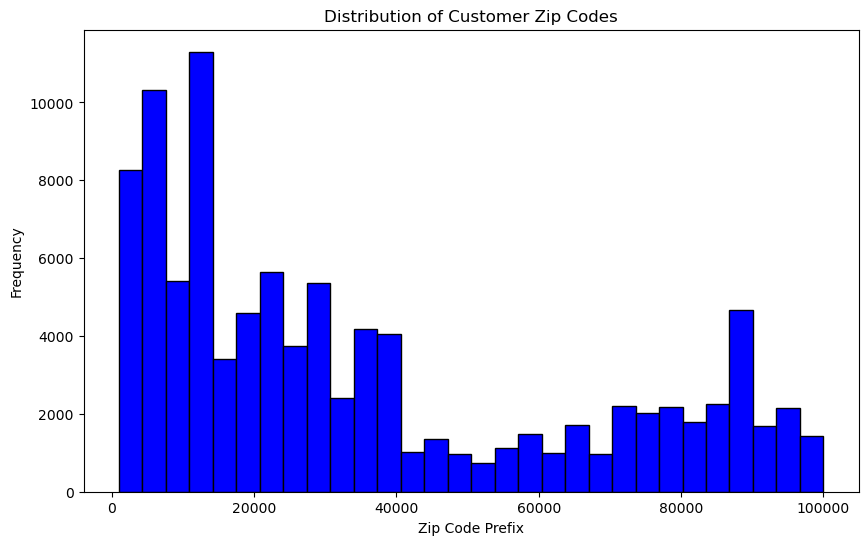

C:\Users\Faiz Muthi\AppData\Local\Temp\ipykernel_12480\745888973.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers_dataset, x='customer_state', palette='Greens')


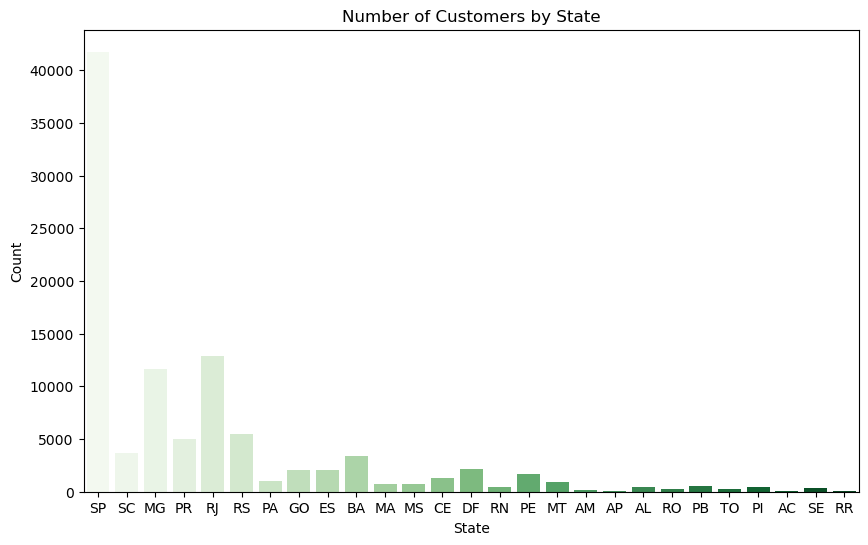

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Customers Dataset
# Distribution of customer zip codes
plt.figure(figsize=(10, 6))
plt.hist(customers_dataset['customer_zip_code_prefix'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Customer Zip Codes')
plt.xlabel('Zip Code Prefix')
plt.ylabel('Frequency')
plt.show()

# Count of customers by state
plt.figure(figsize=(10, 6))
sns.countplot(data=customers_dataset, x='customer_state', palette='Greens')
plt.title('Number of Customers by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

C:\Users\Faiz Muthi\AppData\Local\Temp\ipykernel_12480\2712803084.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products_dataset, y='product_category_name', palette='Purples')


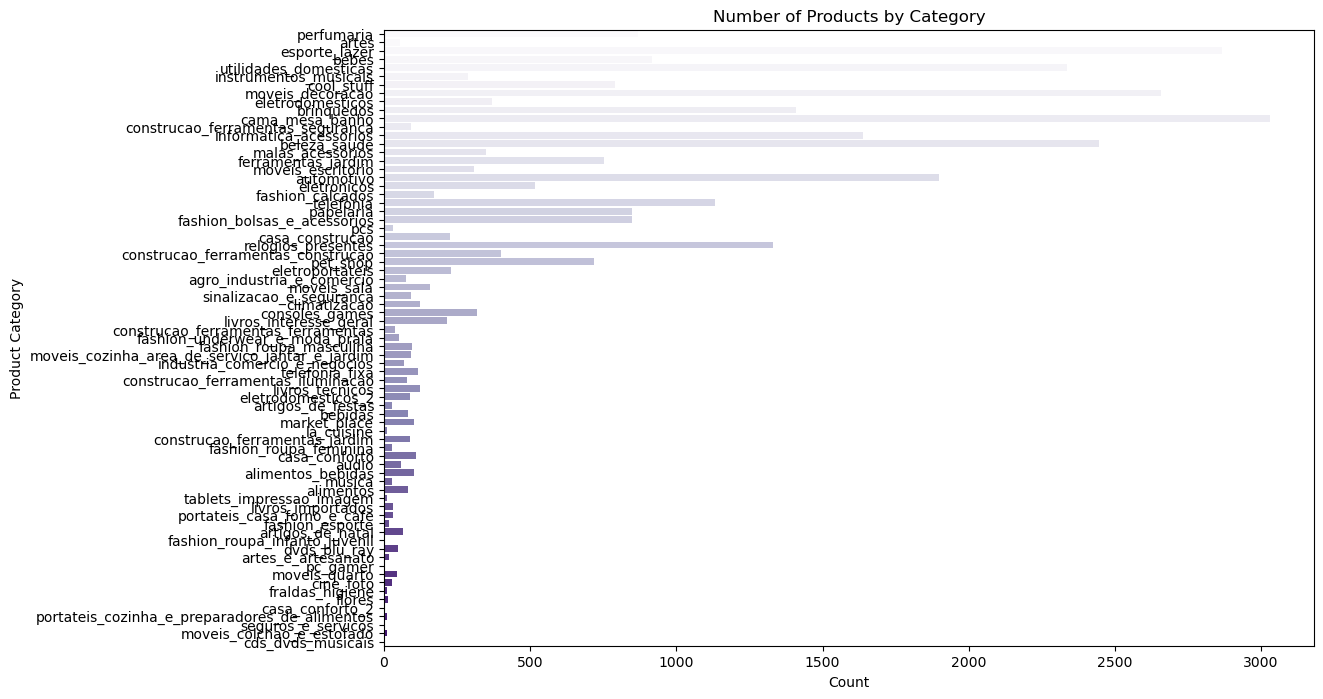

In [4]:
# Count of products by category
plt.figure(figsize=(12, 8))
sns.countplot(data=products_dataset, y='product_category_name', palette='Purples')
plt.title('Number of Products by Category')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

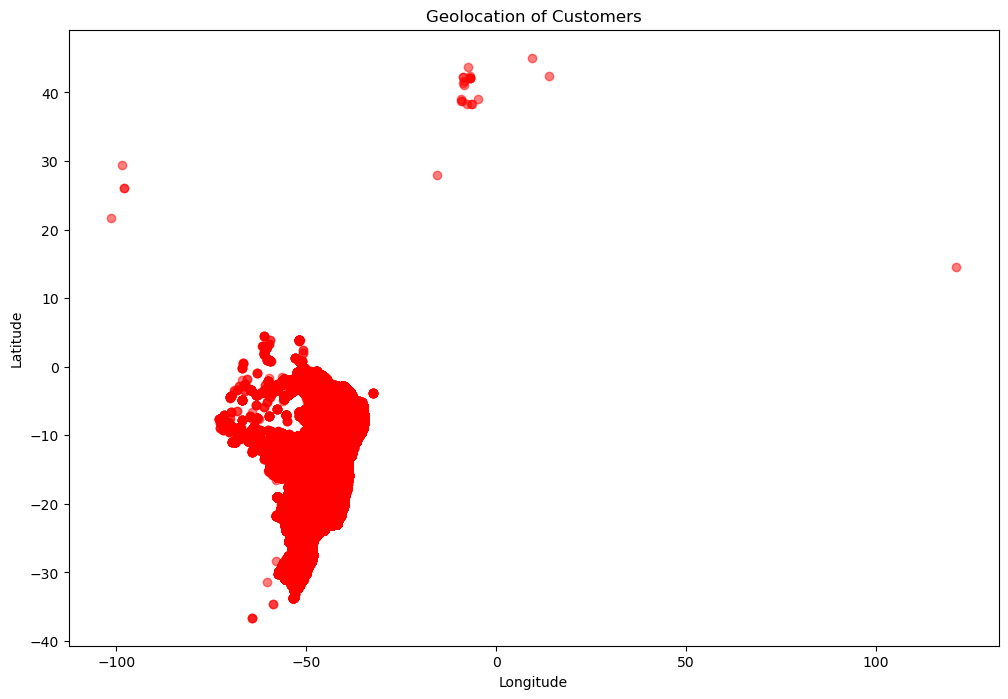

In [5]:
# Geolocation Dataset
# Distribution of latitude and longitude
plt.figure(figsize=(12, 8))
plt.scatter(geolocation_dataset['geolocation_lng'], geolocation_dataset['geolocation_lat'], alpha=0.5, color='red')
plt.title('Geolocation of Customers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

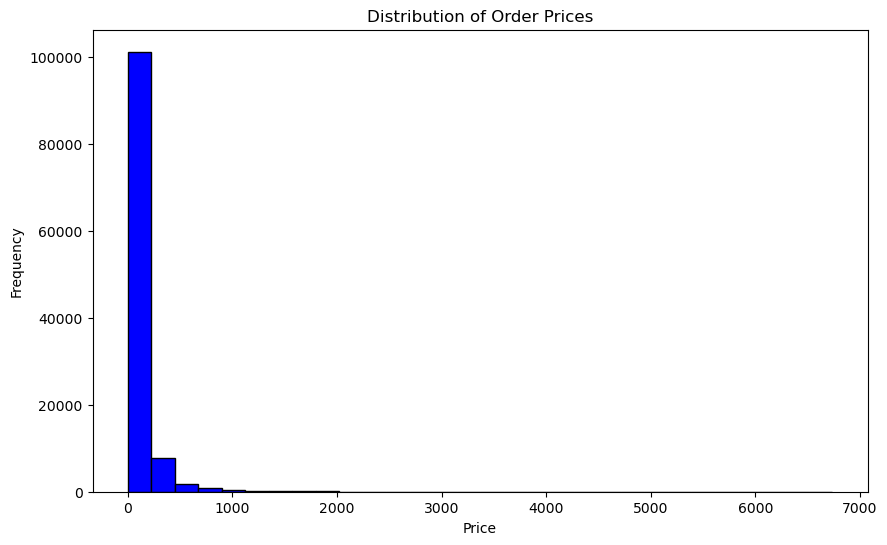

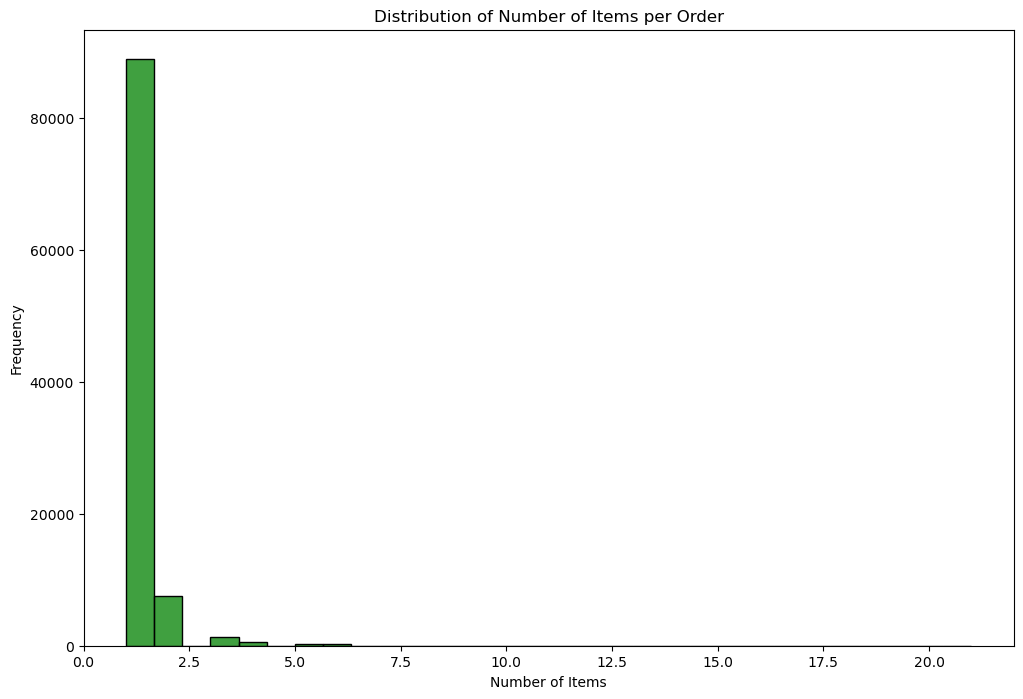

In [6]:
# Order Items Dataset
# Distribution of Prices
plt.figure(figsize=(10, 6))
plt.hist(order_items_dataset['price'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Order Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Aggregate number of items per order
order_items_count = order_items_dataset.groupby('order_id').size().reset_index(name='item_count')
# Plot Number of Items per Order
plt.figure(figsize=(12, 8))
sns.histplot(order_items_count['item_count'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Number of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.show()

C:\Users\Faiz Muthi\AppData\Local\Temp\ipykernel_12480\697471148.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=order_reviews_dataset, x='review_score', palette='Purples')


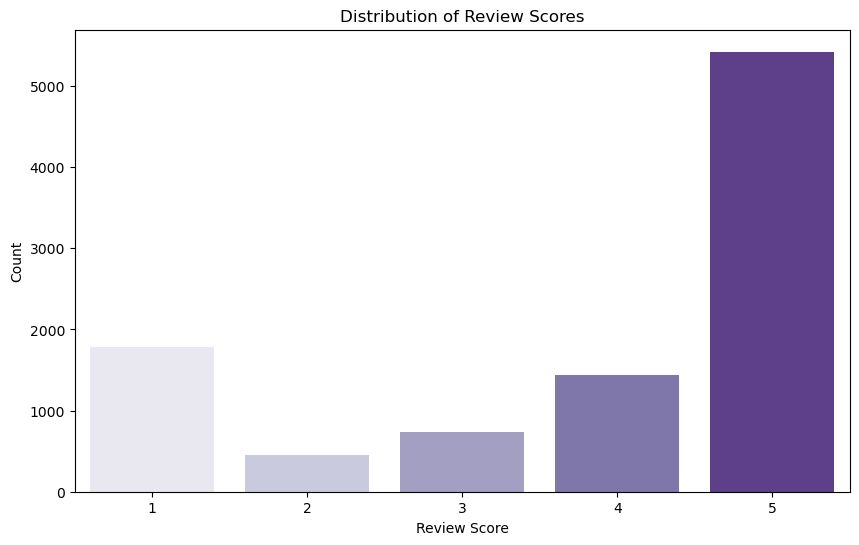

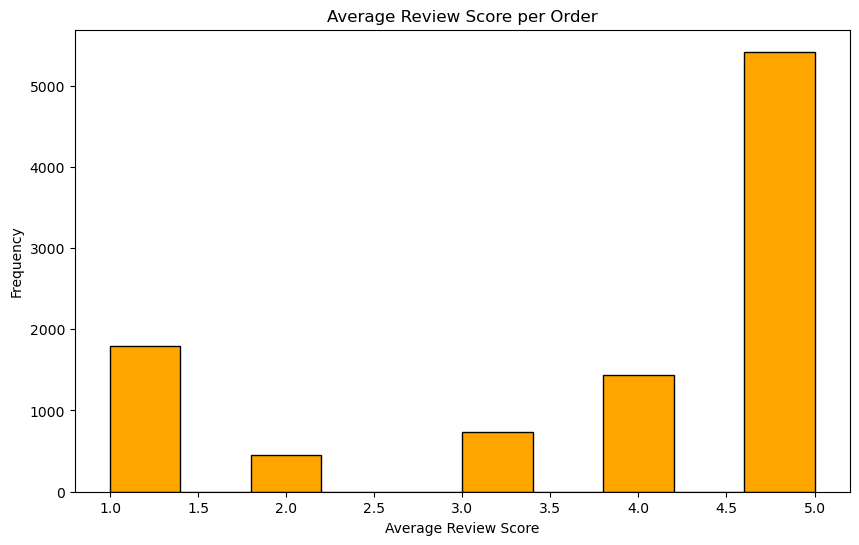

In [7]:
# Order Reviews Dataset
# Distribution of Review Scores
plt.figure(figsize=(10, 6))
sns.countplot(data=order_reviews_dataset, x='review_score', palette='Purples')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

# Average Review Score per Order
order_reviews_avg = order_reviews_dataset.groupby('order_id')['review_score'].mean().reset_index()
order_reviews_avg.rename(columns={'review_score': 'avg_review_score'}, inplace=True)

plt.figure(figsize=(10, 6))
plt.hist(order_reviews_avg['avg_review_score'], bins=10, color='orange', edgecolor='black')
plt.title('Average Review Score per Order')
plt.xlabel('Average Review Score')
plt.ylabel('Frequency')
plt.show()

C:\Users\Faiz Muthi\AppData\Local\Temp\ipykernel_12480\2596340029.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sellers_dataset, x='seller_state', palette='Blues')


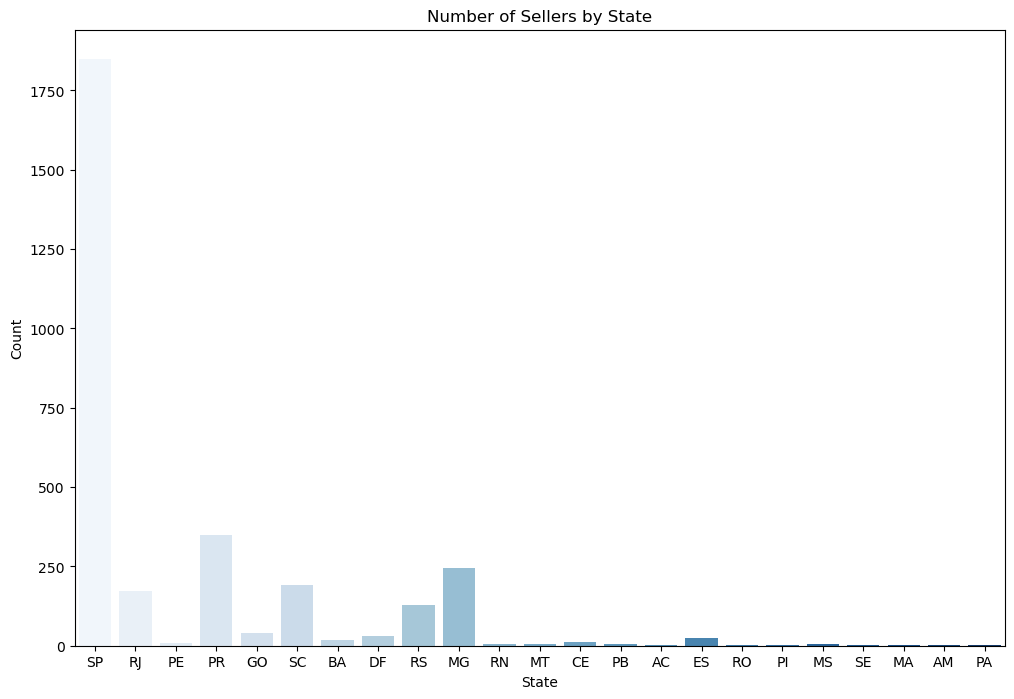

In [8]:
# Sellers Dataset
# Count of Sellers by State
plt.figure(figsize=(12, 8))
sns.countplot(data=sellers_dataset, x='seller_state', palette='Blues')
plt.title('Number of Sellers by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

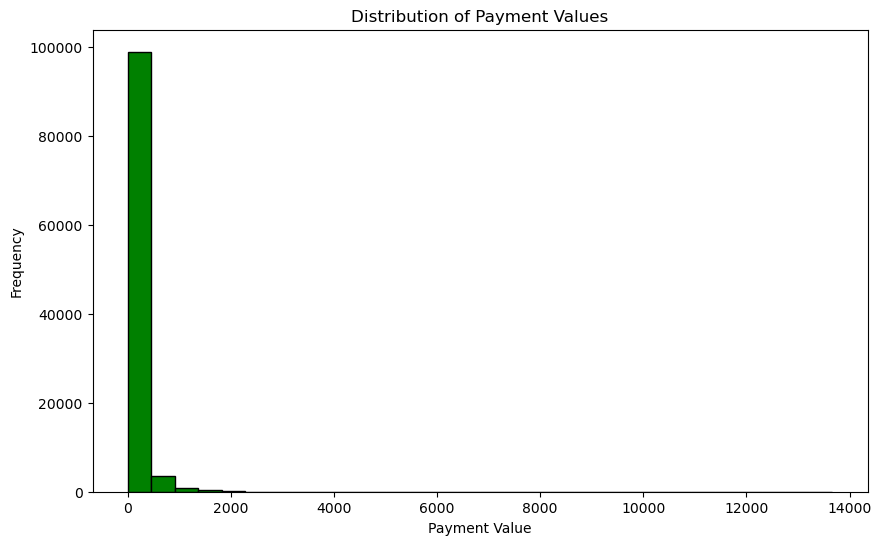

C:\Users\Faiz Muthi\AppData\Local\Temp\ipykernel_12480\163686396.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=order_payments_dataset, x='payment_type', palette='Purples')


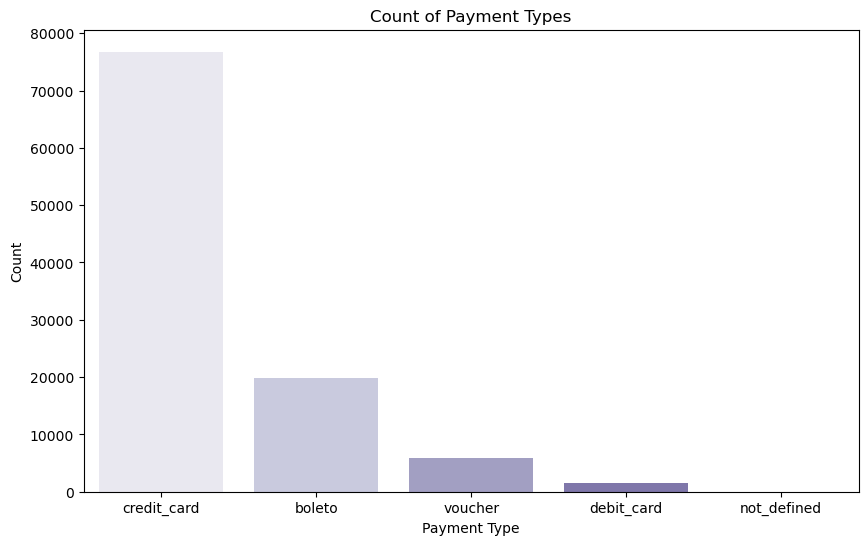

In [9]:
# Order Payments Dataset
# Distribution of Payment Values
plt.figure(figsize=(10, 6))
plt.hist(order_payments_dataset['payment_value'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Payment Values')
plt.xlabel('Payment Value')
plt.ylabel('Frequency')
plt.show()

# Payment Types
plt.figure(figsize=(10, 6))
sns.countplot(data=order_payments_dataset, x='payment_type', palette='Purples')
plt.title('Count of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

C:\Users\Faiz Muthi\AppData\Local\Temp\ipykernel_12480\2846836648.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=orders_dataset, x='order_status', palette='Blues')


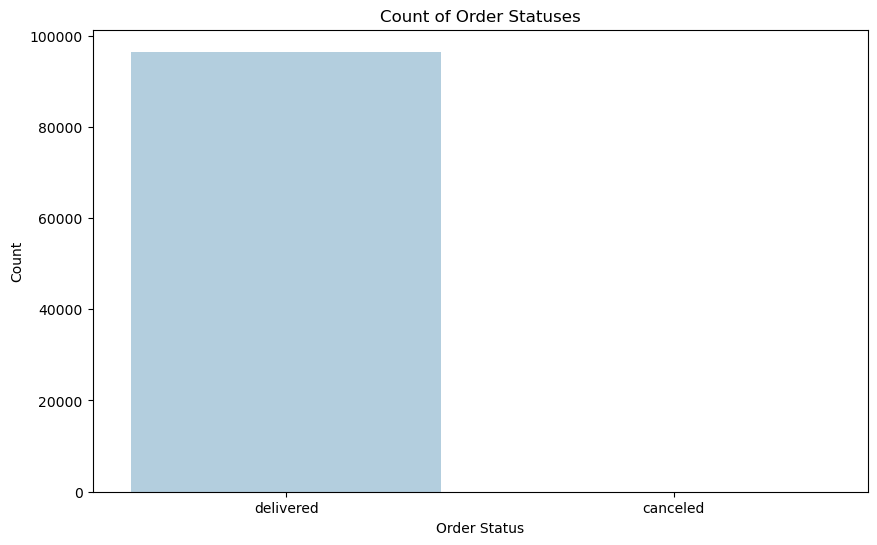

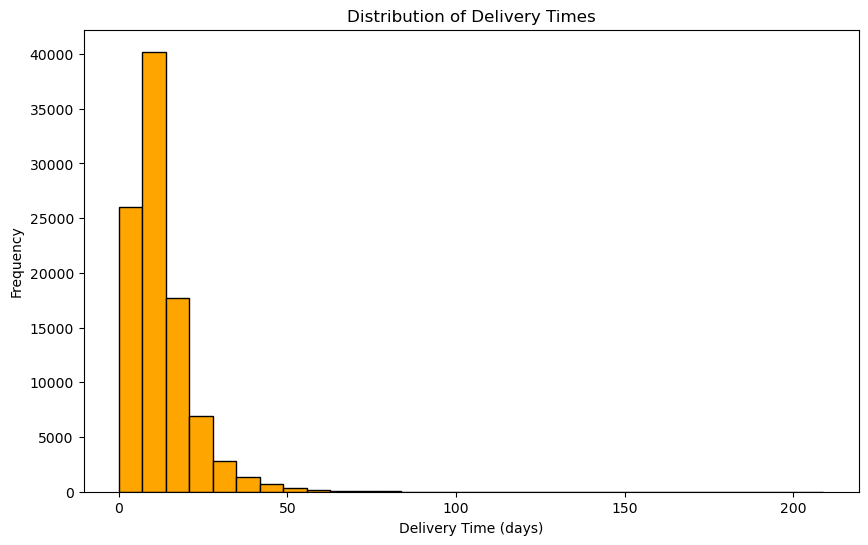

In [10]:
# Orders Dataset
# Distribution of Order Statuses
plt.figure(figsize=(10, 6))
sns.countplot(data=orders_dataset, x='order_status', palette='Blues')
plt.title('Count of Order Statuses')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()

# Calculate delivery time in days
orders_dataset['delivery_time'] = (orders_dataset['order_delivered_customer_date'] - orders_dataset['order_purchase_timestamp']).dt.days

# Plot Distribution of Delivery Times
plt.figure(figsize=(10, 6))
plt.hist(orders_dataset['delivery_time'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Frequency')
plt.show()

3. Advanced Analytics

In [11]:
# Join datasets on order_id
merged_dataset_order = pd.merge(orders_dataset, order_items_dataset, on="order_id", how="left")

# Display the merged dataset
print(merged_dataset_order)

                                order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
110175  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
110176  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
110177  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
110178  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
110179  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp   order_approved_a

In [12]:
# Aggregate sales by month
monthly_sales = merged_dataset_order.groupby(
    pd.Grouper(key='order_purchase_timestamp', freq='M')
).agg(total_sales=('price', 'sum')).reset_index()

# Display the aggregated monthly sales
print(monthly_sales)

   order_purchase_timestamp  total_sales
0                2016-09-30       134.97
1                2016-10-31     40941.30
2                2016-11-30         0.00
3                2016-12-31        10.90
4                2017-01-31    111712.47
5                2017-02-28    232638.86
6                2017-03-31    359198.85
7                2017-04-30    340669.68
8                2017-05-31    489159.25
9                2017-06-30    421923.37
10               2017-07-31    481604.52
11               2017-08-31    554699.70
12               2017-09-30    607220.67
13               2017-10-31    648247.65
14               2017-11-30    987648.07
15               2017-12-31    726033.19
16               2018-01-31    924645.00
17               2018-02-28    826467.12
18               2018-03-31    953356.25
19               2018-04-30    973534.09
20               2018-05-31    977544.69
21               2018-06-30    855591.97
22               2018-07-31    867486.47
23              

C:\Users\Faiz Muthi\AppData\Local\Temp\ipykernel_12480\636503357.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='order_purchase_timestamp', freq='M')


C:\Users\Faiz Muthi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\Faiz Muthi\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Faiz Muthi\AppData\Local\Temp\ipykernel_12480\1596521763.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=sales_ts.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')


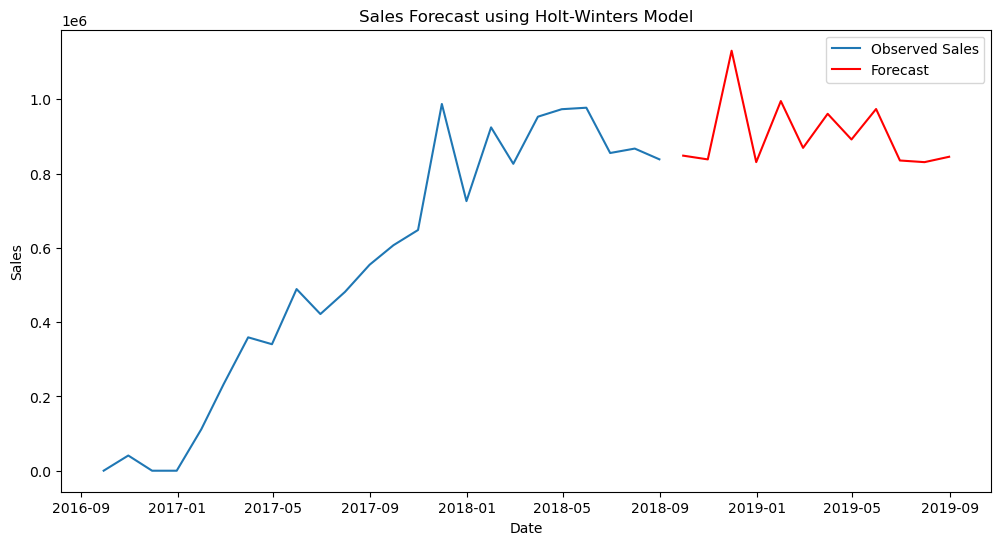

                 Date      Forecast
2018-09-30 2018-09-30  8.484533e+05
2018-10-31 2018-10-31  8.383739e+05
2018-11-30 2018-11-30  1.131020e+06
2018-12-31 2018-12-31  8.310427e+05
2019-01-31 2019-01-31  9.954805e+05
2019-02-28 2019-02-28  8.694209e+05
2019-03-31 2019-03-31  9.611511e+05
2019-04-30 2019-04-30  8.920265e+05
2019-05-31 2019-05-31  9.740452e+05
2019-06-30 2019-06-30  8.354139e+05
2019-07-31 2019-07-31  8.309724e+05
2019-08-31 2019-08-31  8.454502e+05


In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Convert to DataFrame
df = pd.DataFrame(monthly_sales)
df.set_index('order_purchase_timestamp', inplace=True)

# Create a time series object
sales_ts = df['total_sales']

# Apply Holt-Winters method
holt_winters_model = ExponentialSmoothing(
    sales_ts,
    seasonal='add',
    seasonal_periods=12
).fit()

# Forecast the next 12 months
forecast_values = holt_winters_model.forecast(steps=12)

# Generate future dates
forecast_dates = pd.date_range(start=sales_ts.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Create a DataFrame with forecast results
forecast_results = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_values
})

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(sales_ts, label='Observed Sales')
plt.plot(forecast_results.set_index('Date')['Forecast'], label='Forecast', color='red')
plt.title('Sales Forecast using Holt-Winters Model')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Print the forecast results
print(forecast_results)


In [24]:
# Geoanalysis (Using geolocation_dataset):
# !pip install folium

import pandas as pd
import geopandas as gpd
import folium

# Take a sample of the dataset if it's large
sample_size = 10000  # Adjust sample size as needed
geolocation_sample = geolocation_dataset.sample(n=sample_size)


geolocation_gdf = gpd.GeoDataFrame(
    geolocation_sample,  # use the sampled dataset
    geometry=gpd.points_from_xy(geolocation_sample['geolocation_lng'], geolocation_sample['geolocation_lat']),
    crs="EPSG:4326"
)

# Create a Folium map centered around a specific location
m = folium.Map(zoom_start=4)

# Add points to the map
for _, row in geolocation_gdf.iterrows():
    folium.CircleMarker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=2,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m)

# Save the map as an HTML file
# m.save('geolocation_map.html')

# Display the map in the notebook (optional)
m


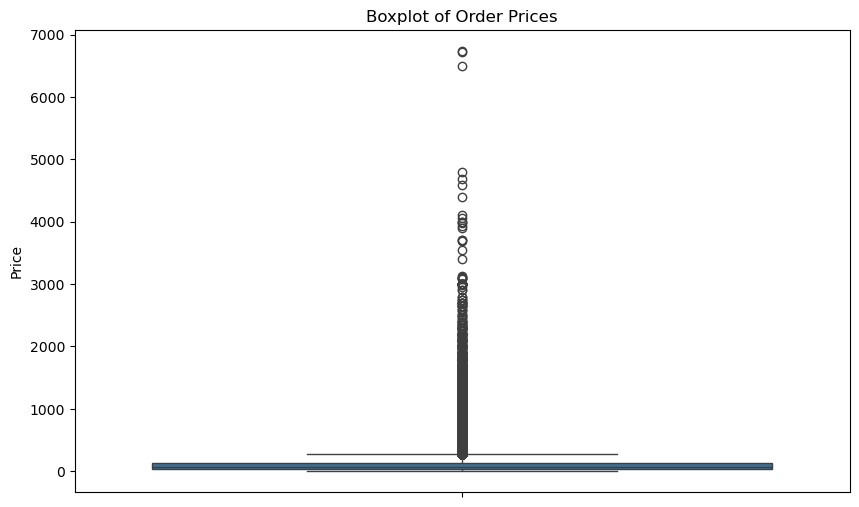

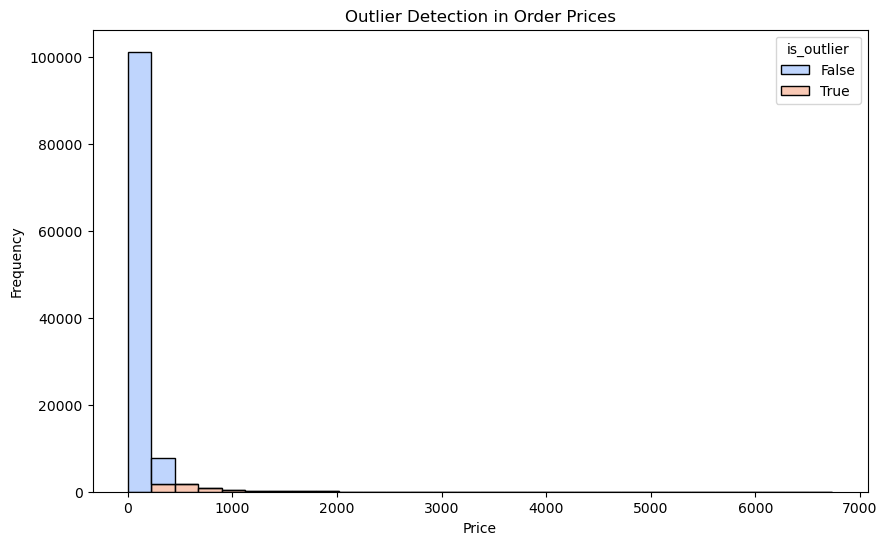

In [25]:
# Outlier Detection (Using order_items_dataset):
# Boxplot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=order_items_dataset['price'])
plt.title('Boxplot of Order Prices')
plt.ylabel('Price')
plt.show()

# Identifying outliers
quantile_95 = order_items_dataset['price'].quantile(0.95)
order_items_dataset['is_outlier'] = order_items_dataset['price'] > quantile_95

# Visualize outliers
plt.figure(figsize=(10, 6))
sns.histplot(order_items_dataset, x='price', hue='is_outlier', multiple='stack', bins=30, palette='coolwarm')
plt.title('Outlier Detection in Order Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

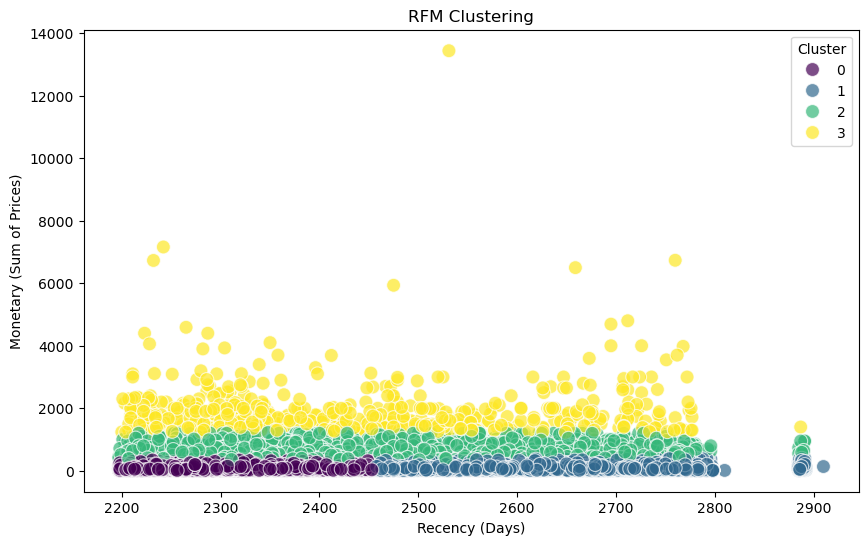

In [26]:
# RFM Analysis (Using orders_dataset):

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Merge datasets
merged_dataset_order_RFM = pd.merge(orders_dataset, order_items_dataset, on='order_id')

# Compute RFM metrics
rfm_data = merged_dataset_order_RFM.groupby('customer_id').agg(
    Recency=('order_purchase_timestamp', lambda x: (pd.Timestamp.now() - x.max()).days),
    Frequency=('order_id', 'count'),
    Monetary=('price', 'sum')
).reset_index()

# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=123)
rfm_data['cluster'] = kmeans.fit_predict(rfm_data[['Recency', 'Frequency', 'Monetary']])

# Visualize RFM clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='cluster', palette='viridis', data=rfm_data, s=100, alpha=0.7)
plt.title('RFM Clustering')
plt.xlabel('Recency (Days)')
plt.ylabel('Monetary (Sum of Prices)')
plt.legend(title='Cluster')
plt.show()


4. Generate a Model

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Merge datasets
merged_dataset_order_generate = pd.merge(orders_dataset, order_items_dataset, on='order_id')

# Convert columns to appropriate types
merged_dataset_order_generate['order_purchase_timestamp'] = pd.to_datetime(merged_dataset_order_generate['order_purchase_timestamp'])
merged_dataset_order_generate['order_approved_at'] = pd.to_datetime(merged_dataset_order_generate['order_approved_at'])
merged_dataset_order_generate['price'] = pd.to_numeric(merged_dataset_order_generate['price'], errors='coerce')
merged_dataset_order_generate['freight_value'] = pd.to_numeric(merged_dataset_order_generate['freight_value'], errors='coerce')
merged_dataset_order_generate['order_status'] = merged_dataset_order_generate['order_status'].astype('category')

# Remove rows with missing values
merged_dataset_order_generate = merged_dataset_order_generate.dropna()

# Define features and target variable
X = merged_dataset_order_generate[['price', 'freight_value']]
y = merged_dataset_order_generate['order_status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train, y_train)

# Make predictions
predictions = rf_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[    0     3]
 [    0 33051]]


C:\Users\Faiz Muthi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Faiz Muthi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    canceled       0.00      0.00      0.00         3
   delivered       1.00      1.00      1.00     33051

    accuracy                           1.00     33054
   macro avg       0.50      0.50      0.50     33054
weighted avg       1.00      1.00      1.00     33054



C:\Users\Faiz Muthi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Due to the imbalanced of the data, I am attempting to balance it with RandomOverSampler and RandomUnderSampler from the imblearn library

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Merge datasets
merged_dataset_order_generate = pd.merge(orders_dataset, order_items_dataset, on='order_id')

# Convert columns to appropriate types
merged_dataset_order_generate['order_purchase_timestamp'] = pd.to_datetime(merged_dataset_order_generate['order_purchase_timestamp'])
merged_dataset_order_generate['order_approved_at'] = pd.to_datetime(merged_dataset_order_generate['order_approved_at'])
merged_dataset_order_generate['price'] = pd.to_numeric(merged_dataset_order_generate['price'], errors='coerce')
merged_dataset_order_generate['freight_value'] = pd.to_numeric(merged_dataset_order_generate['freight_value'], errors='coerce')
merged_dataset_order_generate['order_status'] = merged_dataset_order_generate['order_status'].astype('category')

# Remove rows with missing values
merged_dataset_order_generate = merged_dataset_order_generate.dropna()

# Define features and target variable
X = merged_dataset_order_generate[['price', 'freight_value']]
y = merged_dataset_order_generate['order_status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Set up the resampling techniques
over = RandomOverSampler(sampling_strategy='minority', random_state=123)
under = RandomUnderSampler(sampling_strategy='majority', random_state=123)
resampling_pipeline = Pipeline([
    ('over', over),
    ('under', under)
])

# Resample the training data
X_train_resampled, y_train_resampled = resampling_pipeline.fit_resample(X_train, y_train)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
predictions = rf_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


[[    0     3]
 [   19 33032]]
              precision    recall  f1-score   support

    canceled       0.00      0.00      0.00         3
   delivered       1.00      1.00      1.00     33051

    accuracy                           1.00     33054
   macro avg       0.50      0.50      0.50     33054
weighted avg       1.00      1.00      1.00     33054



The model shows excellent performance for the delivered class but performs poorly on the canceled class. This is indicative of class imbalance, where one class is significantly more frequent than the other. Since the model is biased towards predicting the majority class (delivered), it fails to predict the minority class (canceled), leading to poor Precision, Recall, and F1-score for canceled.